# **Diabetes Prediction Using Deep Learning**

***This project demonstrates how deep learning can be applied to healthcare predictions effectively.***

Done by: <br>
Harish G<br>2448023<br>4MDS


In [18]:
# Importing libraries for data handling and visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

## ***Loading and Displaying the Dataset***

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## ***Exploratory Data Analysis (EDA)***

#### ***Checking the Shape of the Data***

In [3]:
df.shape # returns the number of rows and columns in the dataset

(768, 9)

#### ***Dataset Info***

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.isna().sum() # Show column-wise data types and non-null counts

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe().T.style.background_gradient(cmap='Blues') # View descriptive statistics of the dataset

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000000,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,768.000000,120.894531,31.972618,0.000000,99.000000,117.000000,140.250000,199.000000
BloodPressure,768.000000,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
SkinThickness,768.000000,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
Insulin,768.000000,79.799479,115.244002,0.000000,0.000000,30.500000,127.250000,846.000000
BMI,768.000000,31.992578,7.884160,0.000000,27.300000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,768.000000,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,768.000000,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,768.000000,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


In [7]:
min(df['Age']),max(df['Age']) # Display the minimum and maximum values in the 'Age' column

(21, 81)

In [37]:
# Group 'Age' into intervals of 5 years using pd.cut
age_intervals = pd.cut(df['Age'], bins=range(min(df['Age']) - 1, max(df['Age']) + 5, 5), right=False)

# Count how many records fall into each age group
age_counts = age_intervals.value_counts()

# Create a pie chart using Plotly to visualize age distribution
fig = go.Figure(data=[go.Pie(labels=age_counts.index.astype(str), values=age_counts.values)])

# Add a title to the chart
fig.update_layout(title_text='Distribution of Age')



# Display the chart
fig.show()


#### ***Scatter Plot: Glucose vs Insulin by Outcome***


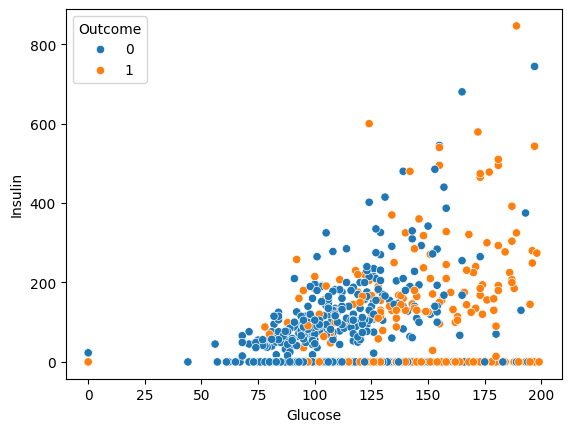

In [9]:
# Create a scatter plot of Glucose vs Insulin, color-coded by Diabetes Outcome (0 or 1)
sns.scatterplot(df, x='Glucose', y='Insulin', hue='Outcome')
plt.show()


**Interpretation**

Individuals with higher glucose levels tend to have higher insulin levels.

Many diabetic patients (orange) show elevated glucose despite low insulin, possibly indicating insulin resistance.

Non-diabetic individuals (blue) cluster more in the lower glucose-insulin region.

There are a significant number of zero insulin values, which may indicate missing or unrecorded measurements needing preprocessing.



#### ***Correlation Matrix of All Features***

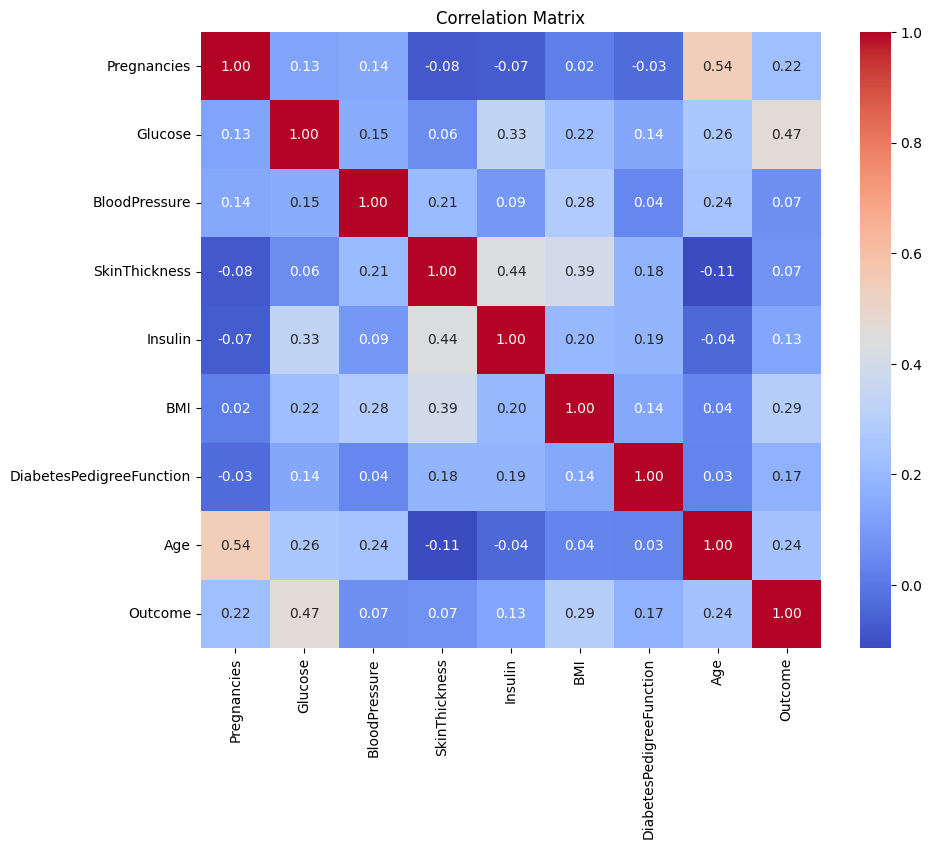

In [10]:
# Compute the correlation matrix for all numerical columns
corr = df.corr()

# Set figure size for better readability
plt.figure(figsize=(10, 8))

# Plot heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})

# Add title to the heatmap
plt.title('Correlation Matrix')

# Show the plot
plt.show()


**Interpretation**

Glucose shows the strongest positive correlation with diabetes outcome (r = 0.47), indicating its high importance in predicting diabetes.

BMI (r = 0.29), Age (r = 0.24), and Pregnancies (r = 0.22) also have moderate positive correlations with the outcome.

Most other features show weak correlations, but combinations may still contribute meaningfully in multivariate models.

Pregnancies and Age are moderately correlated (r = 0.54), which is expected as older individuals may have had more pregnancies.

#### ***Histogram: Distribution of Diabetes Outcome***

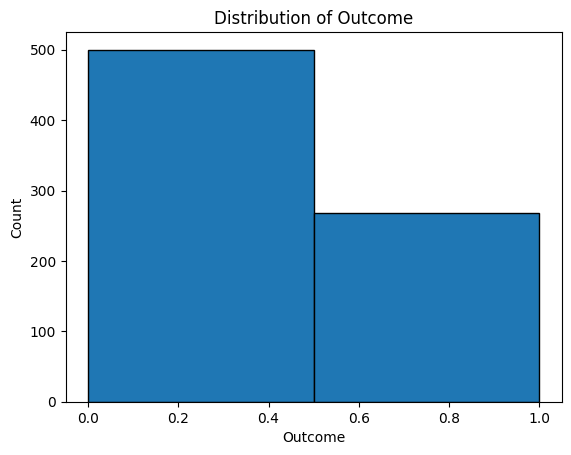

Outcome
0    500
1    268
Name: count, dtype: int64


In [11]:
# Plot a histogram of the 'Outcome' column with 2 bins (0 = No Diabetes, 1 = Diabetes)
plt.hist(df['Outcome'], bins=2, edgecolor='black')

# Label x-axis as Outcome (0 or 1)
plt.xlabel('Outcome')

# Label y-axis as count of records
plt.ylabel('Count')

# Add a descriptive title
plt.title('Distribution of Outcome')

# Display the plot
plt.show()

# Print the exact count of each outcome class
print(df['Outcome'].value_counts())


#### ***Boxplots of Features vs Diabetes Outcome***

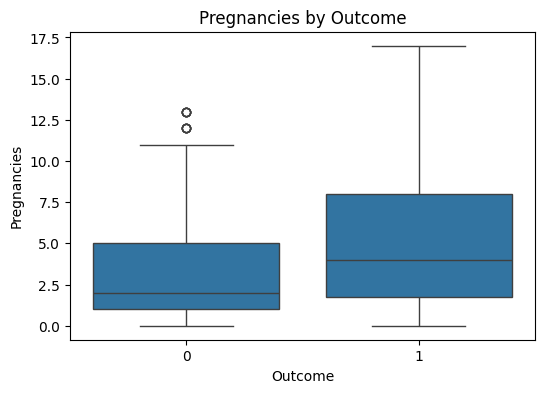

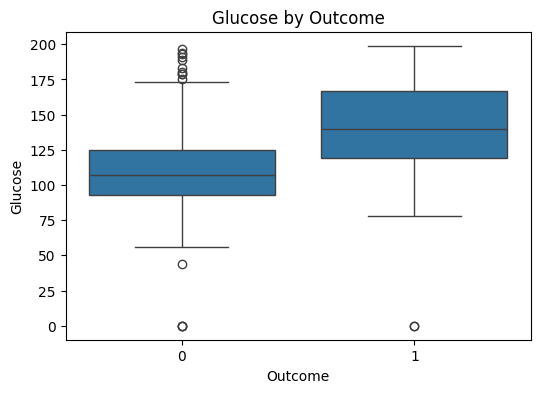

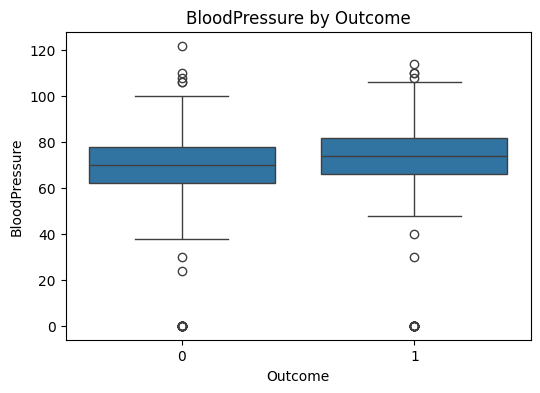

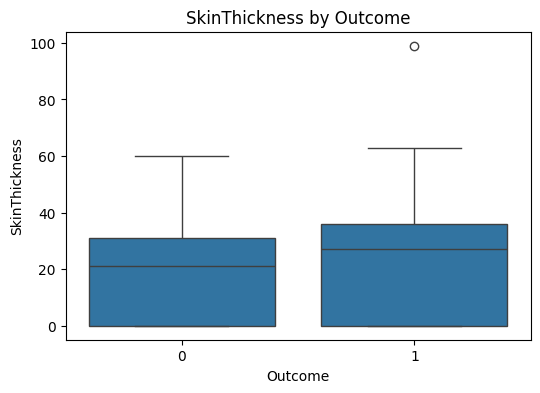

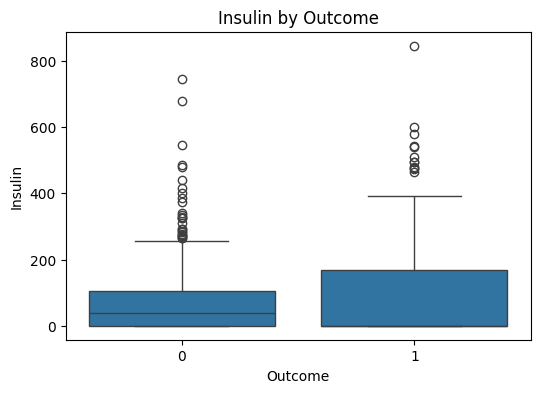

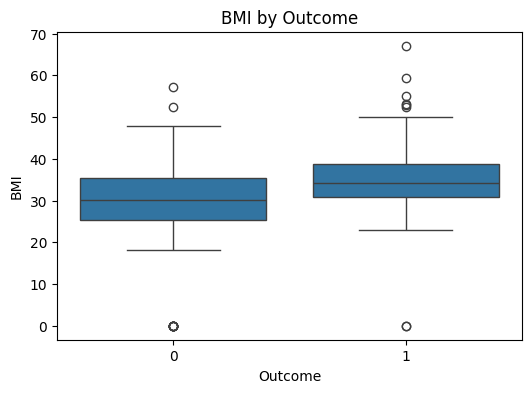

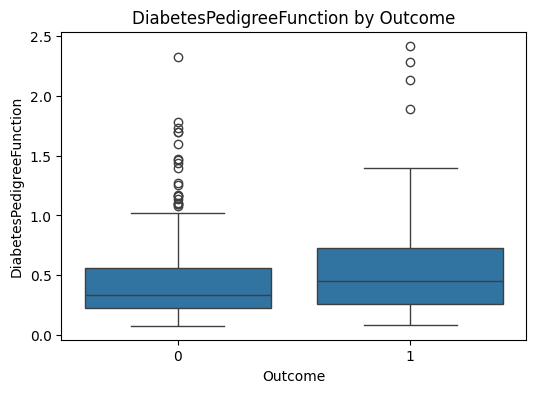

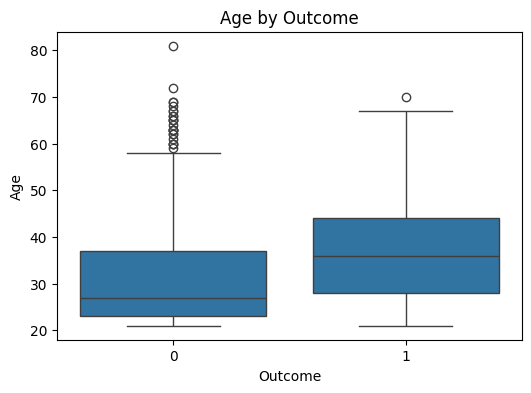

In [12]:
features = df.columns[:-1]  # Exclude the target variable 'Outcome'
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(f'{feature} by Outcome')
    plt.show()

### Box Plot Interpretations

#### 1. **Pregnancies by Outcome**

* Individuals with diabetes (Outcome = 1) tend to have **higher pregnancy counts** compared to those without diabetes.
* The median number of pregnancies is noticeably higher for diabetics.
* A few outliers exist in both classes, especially for non-diabetics.

#### 2. **Glucose by Outcome**

* Glucose levels are **substantially higher** in diabetic individuals.
* The median and range of glucose for Outcome = 1 is clearly shifted upwards.
* Some extreme outliers exist, but the trend shows **glucose is a strong predictor** of diabetes.

#### 3. **BloodPressure by Outcome**

* Blood pressure levels are slightly higher for diabetics, though the difference is less pronounced.
* Both groups show similar variability.
* Several outliers, including zeros, suggest **possible missing or invalid data**.

#### 4. **SkinThickness by Outcome**

* Slightly higher median SkinThickness values are observed in diabetics.
* Many values are zero, likely indicating **missing data**.
* One major outlier (near 100) appears in the diabetic group.

#### 5. **Insulin by Outcome**

* Diabetic individuals tend to have **higher insulin levels**, although there's heavy overlap.
* Numerous outliers exist, especially in the non-diabetic group.
* Zero values imply **missing entries** that should be addressed.

#### 6. **BMI by Outcome**

* Diabetics show **slightly higher BMI medians and ranges**.
* Outliers and zero values exist, suggesting need for imputation or treatment.
* BMI is moderately associated with diabetes.

#### 7. **DiabetesPedigreeFunction by Outcome**

* Diabetics have a slightly higher median DPF score, implying **hereditary influence**.
* Outliers are seen in both groups, more in the diabetic class.

#### 8. **Age by Outcome**

* Diabetic individuals are generally **older**, with visibly higher medians and ranges.
* More outliers (older individuals) are present in the non-diabetic group.




### Treating outliers

'Glucose', 'BloodPressure', 'SkinThickness', 'BMI' because these valuues cannot be zero

In [13]:
features_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

for feature in features_with_invalid_zeros:
    median = df[df[feature] != 0][feature].median()
    df[feature] = df[feature].replace(0, median)

#### ***Pairwise Scatter Plots of All Features by Outcome***

<Figure size 1200x800 with 0 Axes>

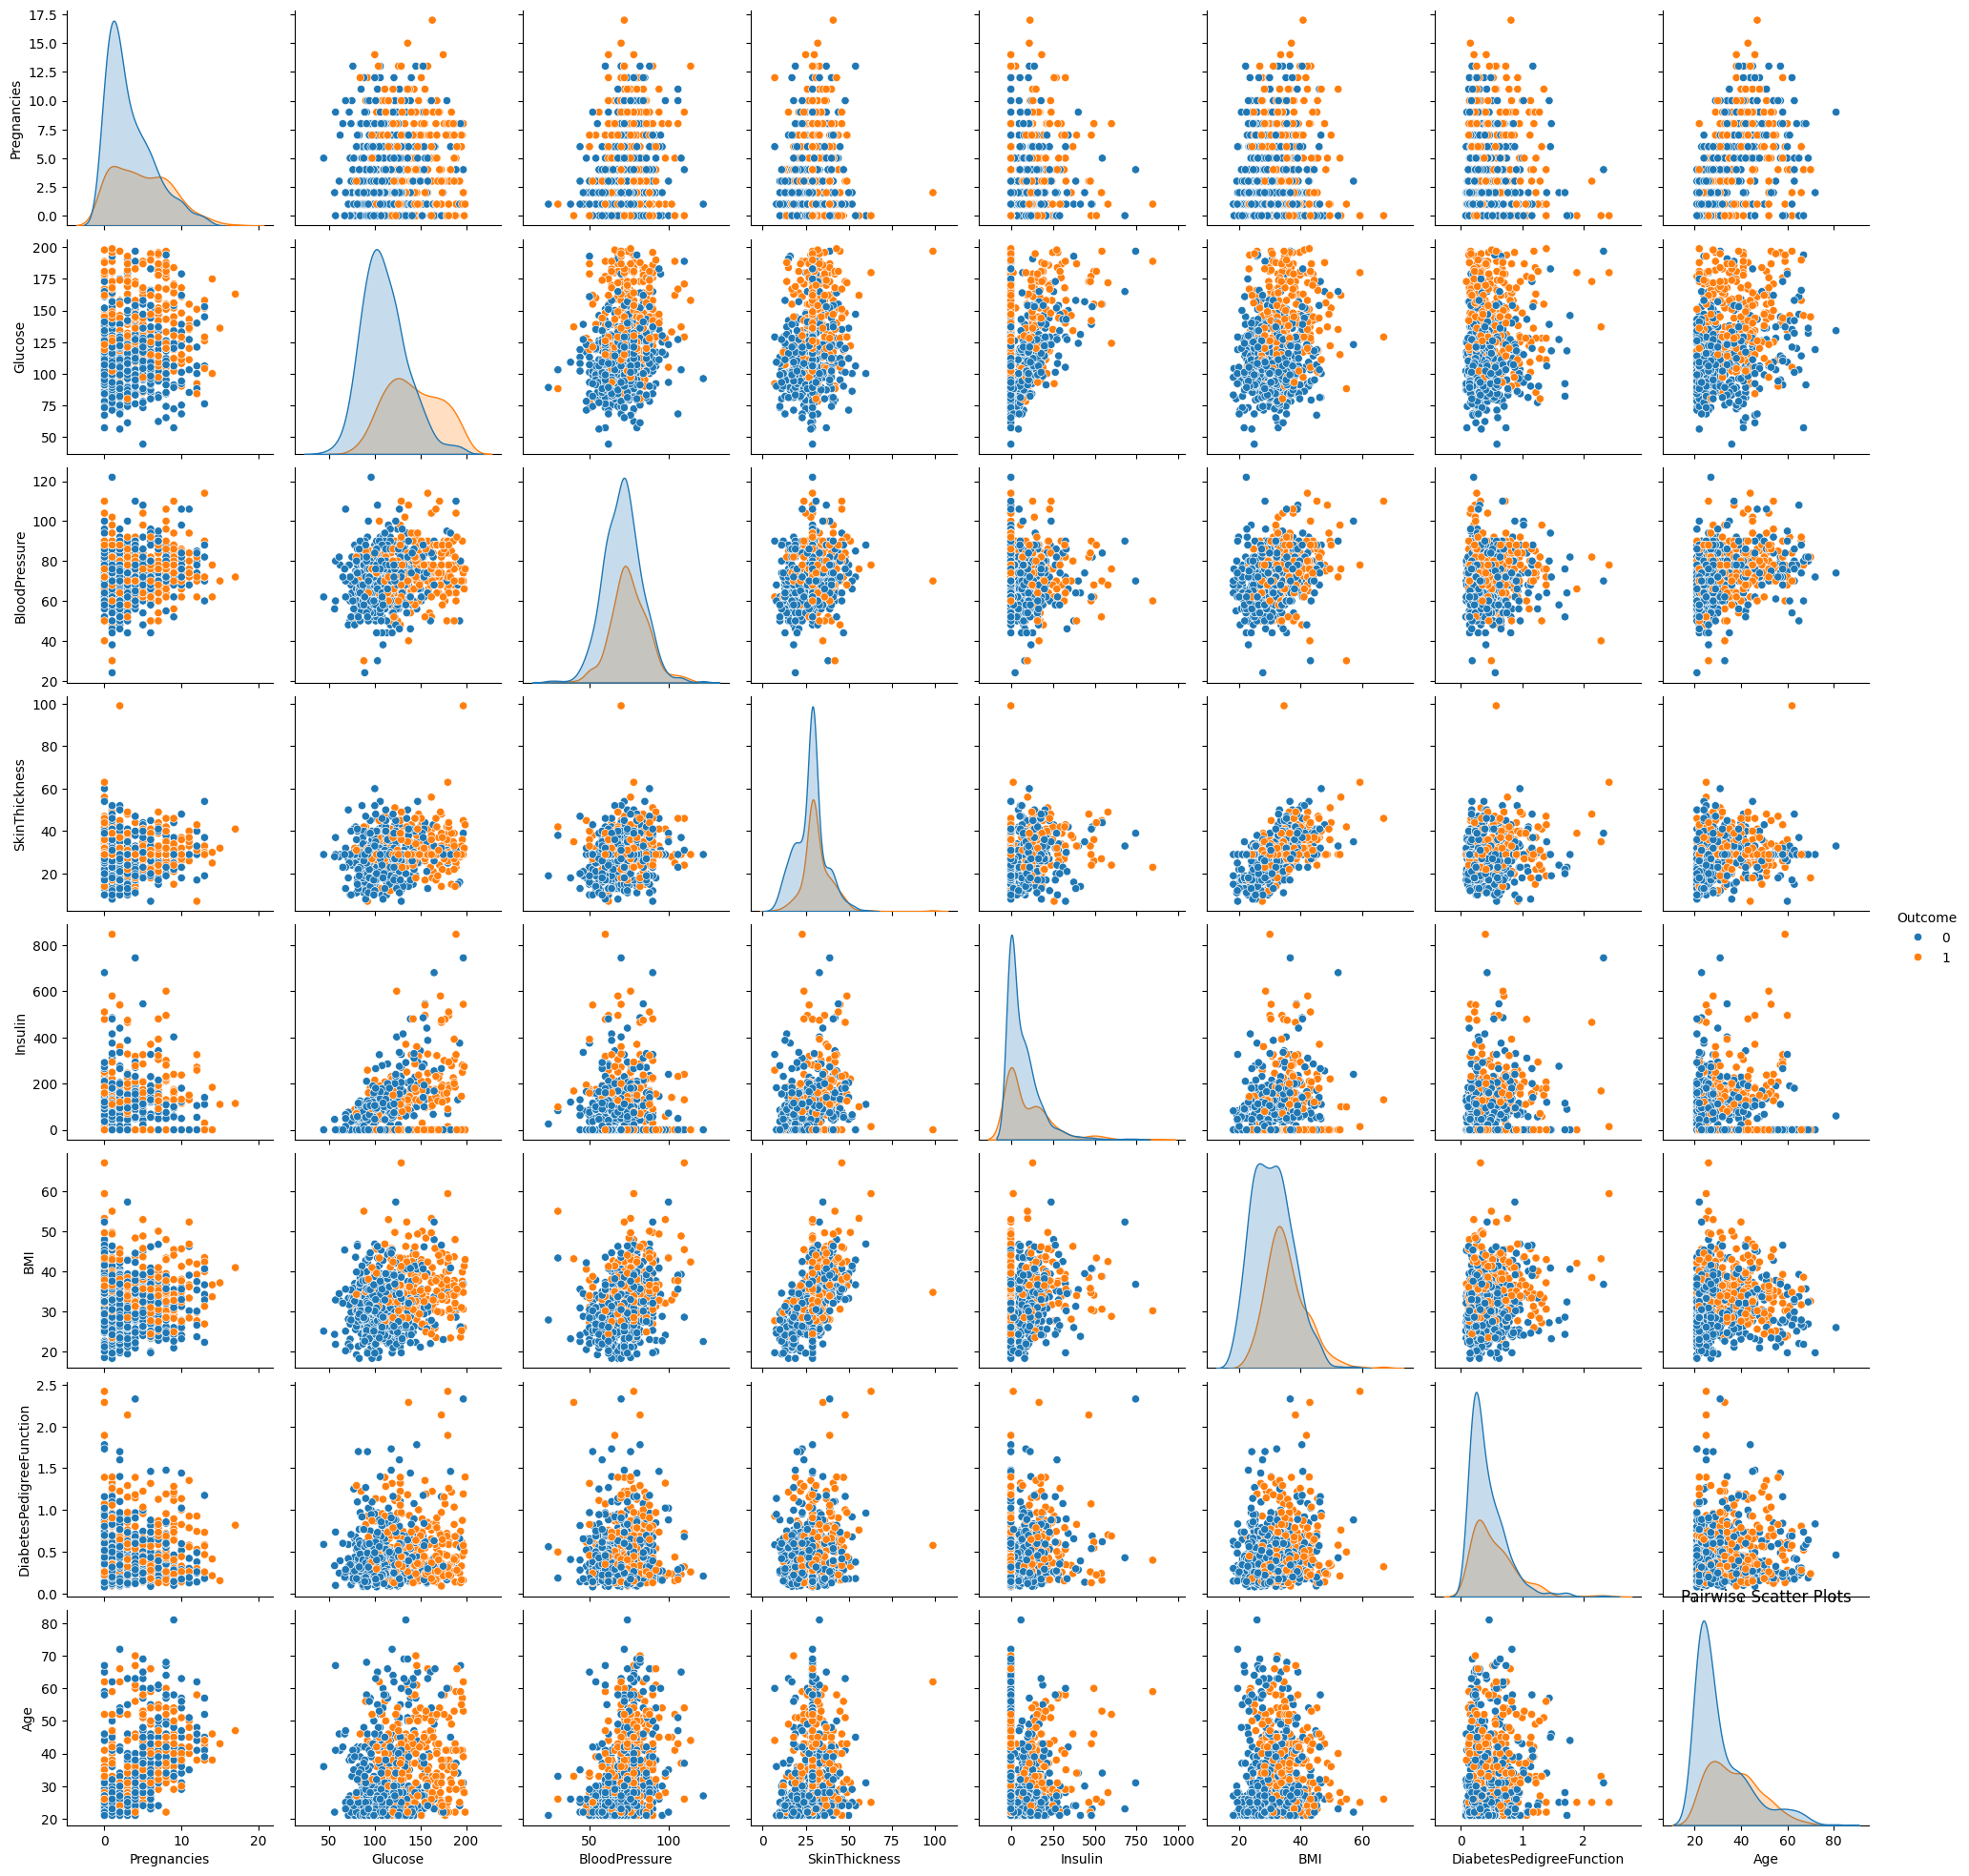

In [14]:
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='Outcome')
plt.title('Pairwise Scatter Plots')
plt.show()


### 📊 Pairplot Interpretation

The pairplot presents a grid of scatter plots and histograms/density plots that visualize the pairwise relationships between all features in the diabetes dataset, categorized by **Outcome (0 = Non-diabetic, 1 = Diabetic)**.

#### Key Insights:

* **Glucose vs Outcome**: There is a clear separation between the two classes. Diabetic individuals (orange) tend to have significantly higher glucose levels. This makes glucose a strong predictive feature.

* **Insulin and Glucose**: A positive correlation is observed between insulin and glucose levels. Diabetic individuals tend to show a higher range for both.

* **BMI vs Outcome**: Diabetic individuals show higher BMI values. This suggests obesity may be a contributing factor to diabetes.

* **Age vs Outcome**: Older individuals are more likely to be diabetic, as seen from the cluster of orange points in higher age ranges.

* **Pregnancies vs Outcome**: Individuals with more pregnancies appear to have a higher likelihood of being diabetic, especially in the range above 5 pregnancies.

* **SkinThickness and Insulin**: Both show some degree of spread, but the relationship is more scattered and weak.

* **Diagonal Histograms**:

  * Glucose and BMI distributions for diabetics (orange) are right-skewed, with higher peaks at higher values.
  * Non-diabetics (blue) are more centered around lower values for glucose, BMI, and insulin.

#### Summary:

This pairplot helps identify which features are most useful in distinguishing diabetic from non-diabetic individuals. Glucose, BMI, Age, and Pregnancies emerge as visually significant indicators.


#### ***Distribution Plots of Features Grouped by Diabetes Outcome***

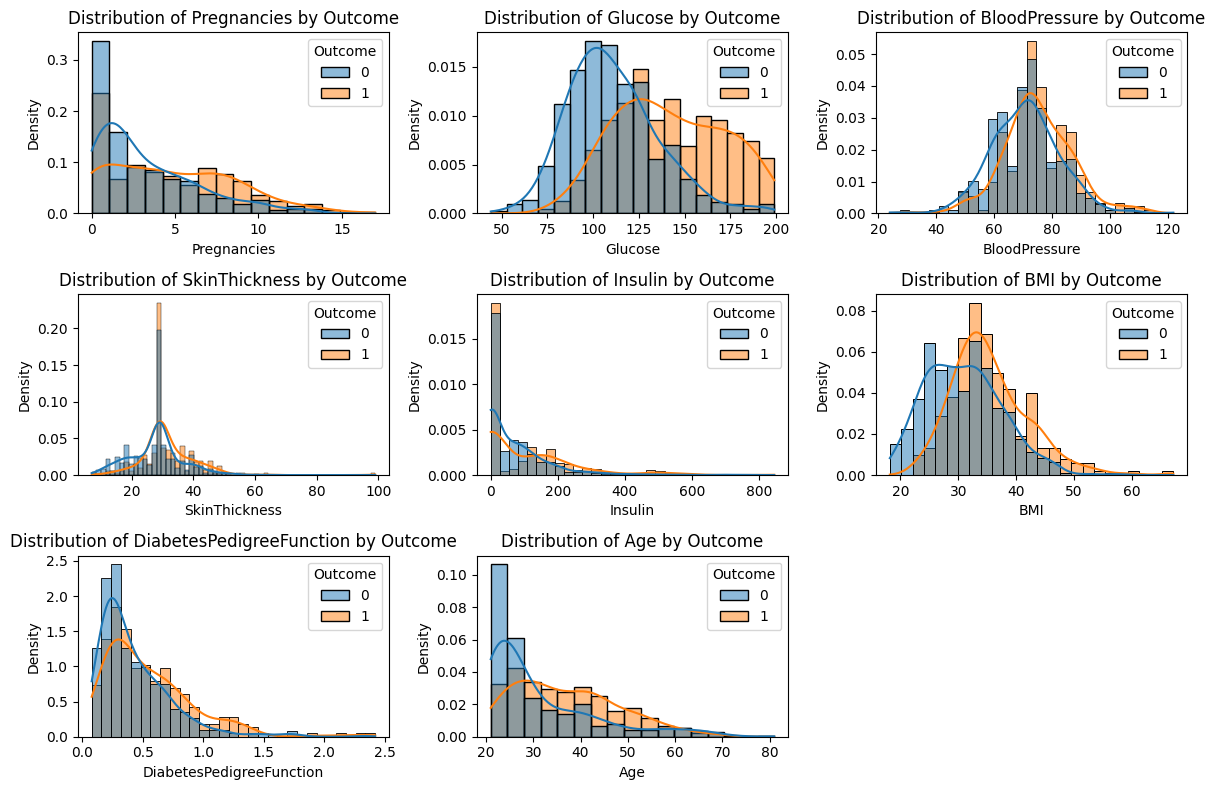

In [15]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df, x=feature, hue='Outcome', kde=True, stat='density', common_norm=False)
    plt.title(f'Distribution of {feature} by Outcome')
plt.tight_layout()
plt.show()


### Distribution Plots by Outcome - Interpretation

#### 1. **Pregnancies**

* Class 1 (Diabetic) has more women with higher pregnancy counts compared to Class 0 (Non-diabetic).
* Distribution is right-skewed, with a peak at 0 for both classes, but Class 1 has a heavier tail.

#### 2. **Glucose**

* Clear distinction between classes: Class 1 has a higher glucose level on average.
* Class 1 distribution is shifted to the right, indicating a strong association between glucose and diabetes.

#### 3. **BloodPressure**

* Similar central tendency in both classes.
* Slightly higher density in Class 1 for mid-range values (70-80), but not a major differentiator.

#### 4. **SkinThickness**

* Both distributions are similar, though Class 1 has a slightly wider spread.
* This feature may not significantly help distinguish outcomes.

#### 5. **Insulin**

* Highly skewed distributions for both classes with long tails.
* Class 1 has a broader spread and slightly higher peak in the low-insulin range.
* Some overlap but potential information in extreme values.

#### 6. **BMI**

* Class 1 is more right-shifted, indicating higher BMI in diabetic individuals.
* This feature is useful for separation between the classes.

#### 7. **DiabetesPedigreeFunction**

* Both distributions are positively skewed.
* Class 1 has a slightly heavier tail, showing potential for this feature in modeling.

#### 8. **Age**

* Class 1 has a broader and slightly right-shifted age distribution.
* Diabetic individuals tend to be older on average compared to non-diabetic individuals.


## ***Splitting the dataset***

In [16]:
# Separate the input features (X) and target label (y)
X = df.drop('Outcome', axis=1)  # X contains all columns except 'Outcome'
y = df['Outcome']               # y contains the target variable (0 or 1)


In [19]:
scaler = StandardScaler()
X=scaler.fit_transform(X)

#### ***Train-Test Split***

In [20]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### ***Early Stopping Configuration for Model Training***

In [21]:
# Stop training early if validation accuracy stops improving for 15 epochs
early_stopping = EarlyStopping(monitor='val_acc', patience=15, restore_best_weights=True)

## ***ANN model***

#### ***Building and Compiling an Artificial Neural Network (ANN)***


In [22]:
# Initialize a Sequential neural network model
ann_model = Sequential()

# Input layer with 32 neurons, ReLU activation, and input shape of 8 features
ann_model.add(Dense(32, activation="relu", input_shape=(8,)))

# Hidden layer with 16 neurons and ReLU activation
ann_model.add(Dense(16, activation="relu"))

# Dropout layer to prevent overfitting by randomly dropping 20% of neurons during training
ann_model.add(Dropout(0.2))

# Another hidden layer with 4 neurons and ReLU activation
ann_model.add(Dense(4, activation="relu"))

# Output layer with 1 neuron and sigmoid activation for binary classification (diabetes: 0 or 1)
ann_model.add(Dense(1, activation="sigmoid"))

# Compile the model using binary crossentropy loss and Adam optimizer
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Display the model architecture summary
ann_model.summary()


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 889 (3.47 KB)

 Trainable params: 889 (3.47 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Train the ANN model for up to 100 epochs with early stopping
# Use test data for validation and track performance over tim
ann_history=ann_model.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test),callbacks=[early_stopping])

print('\nTraining accuracy: ',ann_history.history['acc'][-1],'\nValidation Accuracy: ',ann_history.history['val_acc'][-1])

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - acc: 0.5346 - loss: 0.6938 - val_acc: 0.6429 - val_loss: 0.6575
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.6268 - loss: 0.6549 - val_acc: 0.6623 - val_loss: 0.6267
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.7025 - loss: 0.6210 - val_acc: 0.6948 - val_loss: 0.5955
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.7301 - loss: 0.5947 - val_acc: 0.7143 - val_loss: 0.5675
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.7833 - loss: 0.5481 - val_acc: 0.7208 - val_loss: 0.5456
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.7602 - loss: 0.5589 - val_acc: 0.7403 - val_loss: 0.5299
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.7687 - loss: 0.5118 - val_acc: 0.7338 - val_loss: 0.5150
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.7859 - loss: 0.4692 - val_acc: 0.7468 - val_loss: 0.5053
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - ac

#### ***Plot Training and Validation Accuracy Over Epochs***

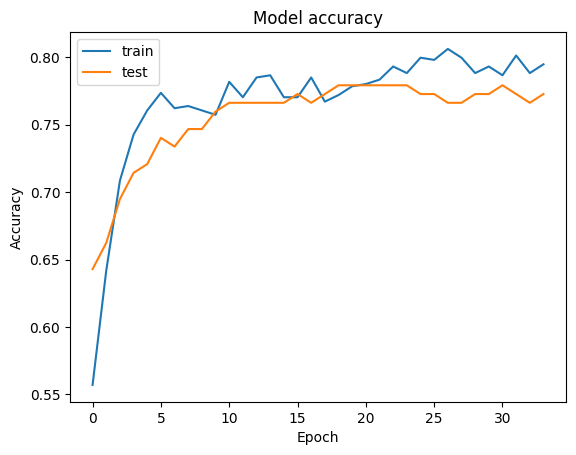

In [24]:
plt.plot(ann_history.history['acc'])
plt.plot(ann_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## ***LSTM model***

#### ***Building and Compiling an LSTM-Based Neural Network***

In [25]:
# Initialize a Sequential model
lstm_model = Sequential()

# First LSTM layer with 64 units, returns full sequences for stacking
lstm_model.add(LSTM(64, return_sequences=True, input_shape=(8, 1)))

# Second LSTM layer with 32 units, also returns sequences
lstm_model.add(LSTM(32, return_sequences=True))

# Third LSTM layer with 16 units, returns only the final output
lstm_model.add(LSTM(16))

# Output layer with 1 neuron and sigmoid activation for binary classification
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model using Adam optimizer and binary crossentropy loss
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# Display the model summary to review layers and parameters
lstm_model.summary()


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 8, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 8, 32)          │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,465 (126.82 KB)

 Trainable params: 32,465 (126.82 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
lstm_history=lstm_model.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test),callbacks=[early_stopping])

print('\nTraining accuracy: ',lstm_history.history['acc'][-1],'\nValidation Accuracy: ',lstm_history.history['val_acc'][-1])

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - acc: 0.5823 - loss: 0.6802 - val_acc: 0.7208 - val_loss: 0.5858
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.7292 - loss: 0.5509 - val_acc: 0.7662 - val_loss: 0.5156
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.7260 - loss: 0.5295 - val_acc: 0.7208 - val_loss: 0.5167
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - acc: 0.7173 - loss: 0.5270 - val_acc: 0.7338 - val_loss: 0.5082
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.7355 - loss: 0.5242 - val_acc: 0.7338 - val_loss: 0.5037
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.7102 - loss: 0.5594 - val_acc: 0.7403 - val_loss: 0.5019
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.7162 - loss: 0.5454 - val_acc: 0.7403 - val_loss: 0.5008
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.7087 - loss: 0.5421 - val_acc: 0.7468 - val_loss: 0.4989
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - a

#### ***Plot LSTM Model Training and Validation Accuracy***

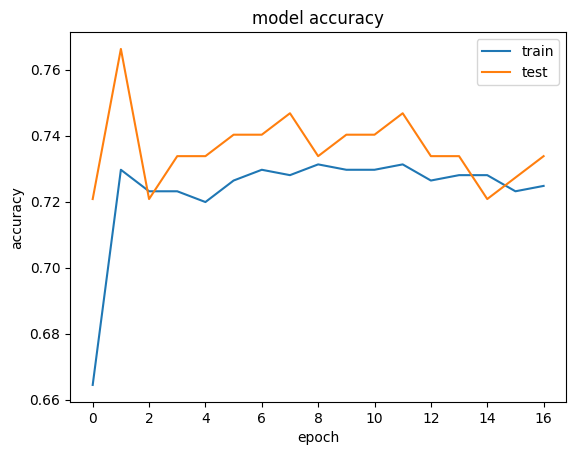

In [27]:
plt.plot(lstm_history.history['acc'])
plt.plot(lstm_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## ***RNN model***

#### ***Building and Compiling a Simple RNN Model***

In [28]:
# Initialize a Sequential RNN model
rnn_model = Sequential()

# Add a SimpleRNN layer with 64 units; input shape expects 8 time steps with 1 feature each
rnn_model.add(SimpleRNN(64, input_shape=(8, 1)))

# Add a Dropout layer to reduce overfitting by randomly dropping 20% of the neurons
rnn_model.add(Dropout(0.2))

# Add a Dense hidden layer with 32 neurons and ReLU activation
rnn_model.add(Dense(32, activation='relu'))

# Add the output layer with 1 neuron and sigmoid activation for binary classification
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model using binary crossentropy loss and Adam optimizer
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# Display the model architecture and number of trainable parameters
rnn_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,337 (24.75 KB)

 Trainable params: 6,337 (24.75 KB)

 Non-trainable params: 0 (0.00 B)

#### ***Train, Evaluate the Simple RNN Model***


In [30]:
# Train the RNN model for up to 20 epochs using early stopping
rnn_history=rnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test,y_test),callbacks=[early_stopping])
print('\nTraining accuracy: ',rnn_history.history['acc'][-1],'\nValidation Accuracy: ',rnn_history.history['val_acc'][-1])

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.7692 - loss: 0.4381 - val_acc: 0.7532 - val_loss: 0.4779
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.7708 - loss: 0.4542 - val_acc: 0.7792 - val_loss: 0.4880
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.7786 - loss: 0.4365 - val_acc: 0.7403 - val_loss: 0.4888
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - acc: 0.7980 - loss: 0.4246 - val_acc: 0.7532 - val_loss: 0.4939
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.7652 - loss: 0.4680 - val_acc: 0.7403 - val_loss: 0.4844
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.7788 - loss: 0.4345 - val_acc: 0.7532 - val_loss: 0.4918
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.7627 - loss: 0.4439 - val_acc: 0.7468 - val_loss: 0.5001
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.8149 - loss: 0.4131 - val_acc: 0.7273 - val_loss: 0.4947
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - acc: 0.8084

#### ***Plot RNN Model Accuracy Over Epochs***

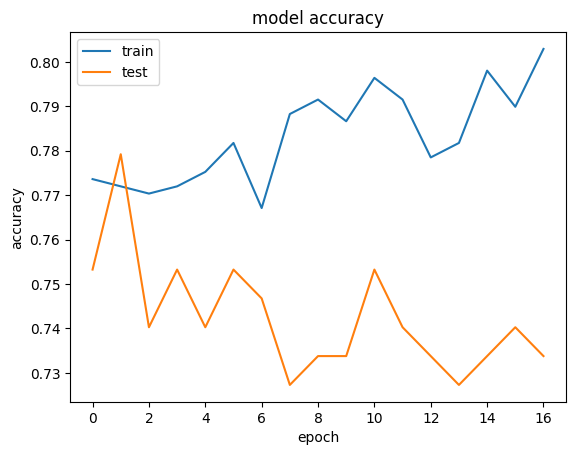

In [31]:
plt.plot(rnn_history.history['acc'])
plt.plot(rnn_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## ***Compare Accuracy of ANN, LSTM, and RNN Models***

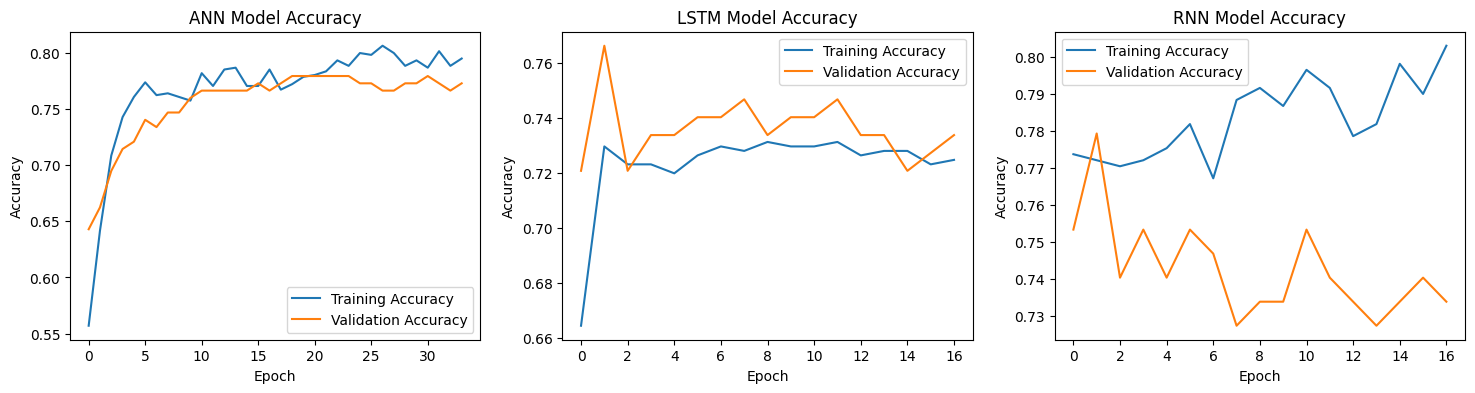

In [32]:
# Create a 1-row, 3-column plot layout to compare models side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Plot ANN training and validation accuracy
axes[0].plot(ann_history.history['acc'], label='Training Accuracy')
axes[0].plot(ann_history.history['val_acc'], label='Validation Accuracy')
axes[0].set_title('ANN Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='best')

# Plot LSTM training and validation accuracy
axes[1].plot(lstm_history.history['acc'], label='Training Accuracy')
axes[1].plot(lstm_history.history['val_acc'], label='Validation Accuracy')
axes[1].set_title('LSTM Model Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc='best')

# Plot RNN training and validation accuracy
axes[2].plot(rnn_history.history['acc'], label='Training Accuracy')
axes[2].plot(rnn_history.history['val_acc'], label='Validation Accuracy')
axes[2].set_title('RNN Model Accuracy')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Accuracy')
axes[2].legend(loc='best')

# Display the full comparison plot
plt.show()


## ***Evaluating All Models on Test Data***

In [33]:
# Evaluate the ANN model on the test data
ann_pred = ann_model.evaluate(X_test, y_test)

# Evaluate the LSTM model on the test data
lstm_pred = lstm_model.evaluate(X_test, y_test)

# Evaluate the RNN model on the test data
rnn_pred = rnn_model.evaluate(X_test, y_test)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.7584 - loss: 0.5008
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - acc: 0.7350 - loss: 0.5418
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.7615 - loss: 0.4975 


In [35]:
# Print test loss and accuracy for each model
print('ANN Test Loss:', ann_pred[0], '| ANN Test Accuracy:', ann_pred[1])
print('LSTM Test Loss:', lstm_pred[0], '| LSTM Test Accuracy:', lstm_pred[1])
print('RNN Test Loss:', rnn_pred[0], '| RNN Test Accuracy:', rnn_pred[1])

ANN Test Loss: 0.4862035810947418 | ANN Test Accuracy: 0.7792207598686218
LSTM Test Loss: 0.515561044216156 | LSTM Test Accuracy: 0.7662337422370911
RNN Test Loss: 0.4880317449569702 | RNN Test Accuracy: 0.7792207598686218


## ***Compare Loss and Accuracy of ANN, LSTM, and RNN Models***

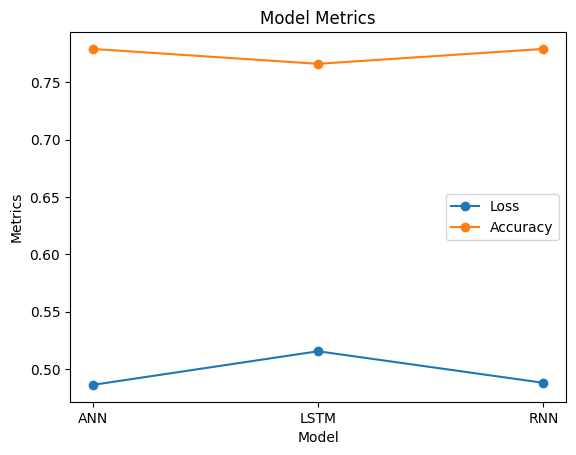

In [34]:
models=['ANN','LSTM','RNN']
plt.plot(models,[ann_pred[0],lstm_pred[0],rnn_pred[0]],marker= 'o',label='Loss')
plt.plot(models,[ann_pred[1],lstm_pred[1],rnn_pred[1]],marker= 'o',label='Accuracy')
plt.title('Model Metrics')
plt.xlabel('Model')
plt.ylabel('Metrics')
plt.legend(loc='best')
plt.show()

### **Model Interpretation: Which Model is Optimum and Why?**

**Optimum Model:**
The Artificial Neural Network (ANN) is the optimum model for this diabetes prediction task. It achieved the highest accuracy and lowest loss on the test data compared to the LSTM and RNN models.

**Why ANN is Optimum:**
- The dataset is tabular and static, not sequential or time-series. ANN is well-suited for such data, efficiently learning the relationships between features and the target.
- ANN trained faster and generalized better, as shown by its validation accuracy and loss.

**Why LSTM and RNN Performed Worse:**
- LSTM and RNN are designed for sequential or time-dependent data, where the order of inputs matters (e.g., time series, text). In this case, treating the features as a sequence does not provide any additional benefit.
- These models are more complex, which can lead to overfitting or inefficient learning when applied to non-sequential, tabular data.
- Their added complexity did not translate into better performance, as the dataset does not have temporal dependencies.

**Summary:**
For static, tabular datasets like the Pima Indians Diabetes Dataset, simpler feedforward models like ANN are more effective and efficient than sequence models like LSTM and RNN.